In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datetime import datetime, timezone

In [32]:
# Save data in a DataFrame
data = pd.read_csv('/content/clean_data.csv')

In [33]:
# Clean date column
data['publishedAt'] = pd.to_datetime(data['publishedAt'])

In [34]:
# Explore data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18273 entries, 0 to 18272
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   videoId           18273 non-null  object             
 1   title             18273 non-null  object             
 2   description       17897 non-null  object             
 3   tags              17845 non-null  object             
 4   publishedAt       18273 non-null  datetime64[ns, UTC]
 5   duration          18273 non-null  object             
 6   category          18273 non-null  object             
 7   viewCount         18273 non-null  int64              
 8   likeCount         18273 non-null  int64              
 9   commentCount      18272 non-null  float64            
 10  duration_seconds  18273 non-null  int64              
 11  duration_minutes  18273 non-null  float64            
 12  duration_hours    18273 non-null  float64            
dtypes

In [35]:
# function to generate dictionary of total content time (in hours) at multiple time frequencies

def calculate_total_durations(df):
    """
    Calculate total content time (in hours) at multiple time frequencies.

    Input
    -----
    df : pandas DataFrame
        Must contain columns ['duration_hours', 'publishedAt']

    Output
    ------
    dict with:
        - daily_total_durations
        - weekly_total_durations
        - monthly_total_durations
        - yearly_total_durations

    Each value is a pandas Series of total duration (hours) indexed by period.
    """

    data = df.copy()

    totals = {
        "daily_total_durations": (data.groupby(data["publishedAt"].dt.date)["duration_hours"].sum()),
        "weekly_total_durations": (data.groupby(data["publishedAt"].dt.to_period("W"))["duration_hours"].sum()),
        "monthly_total_durations": (data.groupby(data["publishedAt"].dt.to_period("M"))["duration_hours"].sum()),
        "yearly_total_durations": (data.groupby(data["publishedAt"].dt.to_period("Y"))["duration_hours"].sum()),
    }

    return totals

In [36]:
# function to filter dates

def filter_duration_dates(series, start=None, end=None):
    """
    Filter a Series produced by calculate_total_durations() by date range.

    Input
    -----
    series : pandas Series
        One of the values from calculate_total_durations()
    start, end : str or None
        Date bounds like '2022-01-01' or '2022-01'

    Output
    ------
    pandas Series
        Filtered Series (same structure, ready to plot)
    """

    s = series.copy()

    # Normalize index to Timestamp for comparison
    if isinstance(s.index, pd.PeriodIndex):
        s.index = s.index.to_timestamp()
    else:
        s.index = pd.to_datetime(s.index)

    if start is not None:
        s = s[s.index >= pd.to_datetime(start)]
    if end is not None:
        s = s[s.index <= pd.to_datetime(end)]

    return s

In [37]:
# Function to plot total content time (hours) over time
def plot_total_durations(total_duration_series):
    """
    Plot total content time (hours) over time.

    Input
    -----
    total_duration_series : pandas Series
    """

    series = total_duration_series.copy()

    # Convert PeriodIndex to Timestamp for plotting if needed
    if isinstance(series.index, pd.PeriodIndex):
        series.index = series.index.to_timestamp()

    plt.figure(figsize=(10, 5))
    plt.plot(series.index, series.values)
    plt.xlabel("Time")
    plt.ylabel("Total content time (hours)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [38]:
# dictionary with total content time (in hours) at multiple time frequencies
total_video_durations = calculate_total_durations(data)

/tmp/ipython-input-2498975963.py:27: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "weekly_total_durations": (data.groupby(data["publishedAt"].dt.to_period("W"))["duration_hours"].sum()),
/tmp/ipython-input-2498975963.py:28: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "monthly_total_durations": (data.groupby(data["publishedAt"].dt.to_period("M"))["duration_hours"].sum()),
/tmp/ipython-input-2498975963.py:29: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "yearly_total_durations": (data.groupby(data["publishedAt"].dt.to_period("Y"))["duration_hours"].sum()),


In [39]:
total_video_durations["monthly_total_durations"].info()

<class 'pandas.core.series.Series'>
PeriodIndex: 132 entries, 2015-01 to 2025-12
Freq: M
Series name: duration_hours
Non-Null Count  Dtype  
--------------  -----  
132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


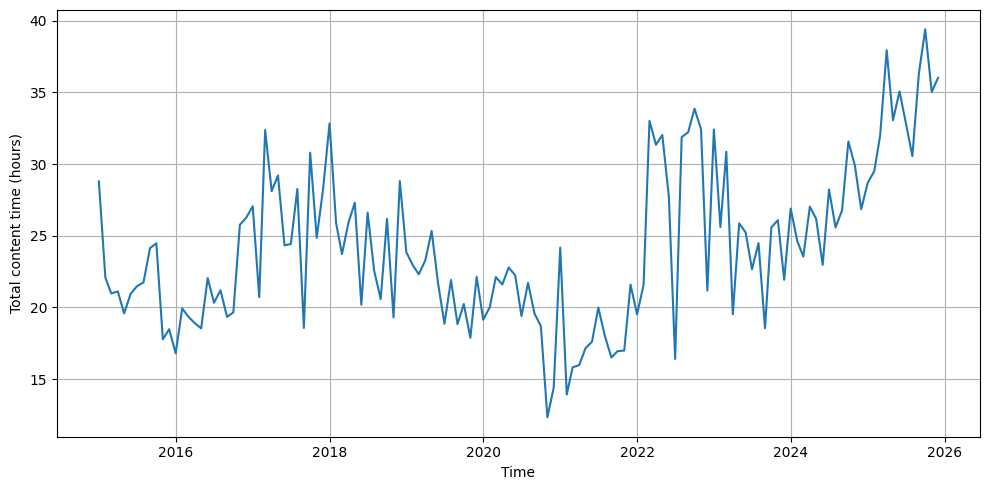

In [40]:
# Plot a line graph of total content time (in hours) at a monthly frequency
plot_total_durations(total_video_durations["monthly_total_durations"])

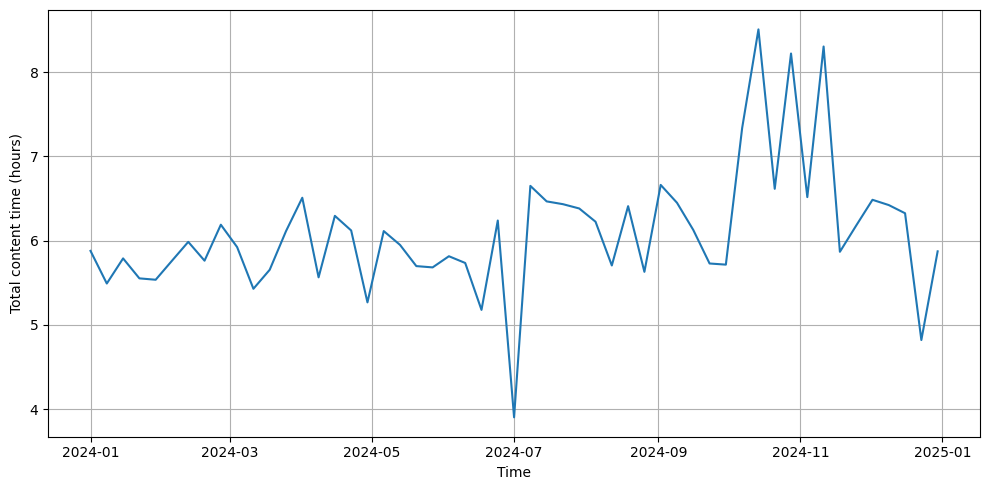

In [41]:
# Plot a line graph of total content time (in hours) at a weekly frequency for 2024
plot_total_durations(
    filter_duration_dates(
        total_video_durations["weekly_total_durations"],
        start="2024-01-01",
        end="2024-12-31"))

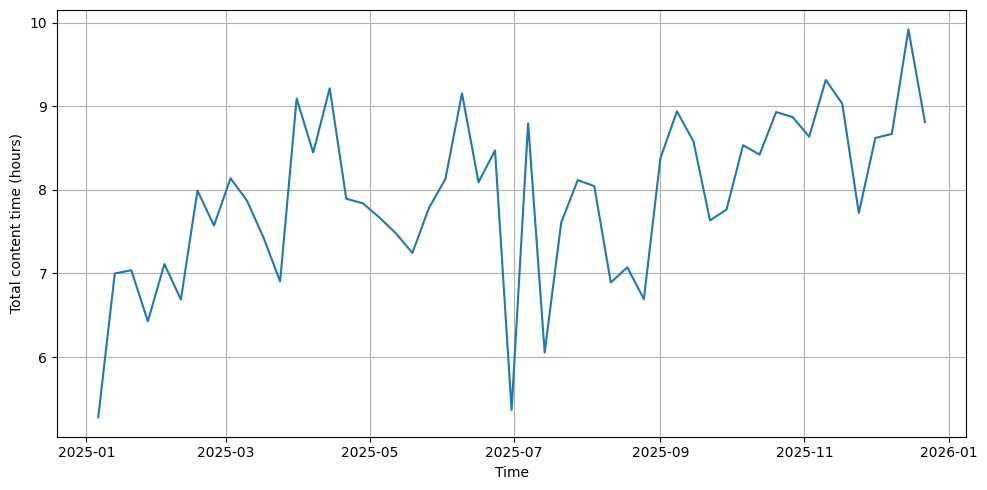

In [42]:
# Plot a line graph of total content time (in hours) at a weekly frequency for 2025
plot_total_durations(
    filter_duration_dates(
        total_video_durations["weekly_total_durations"],
        start="2025-01-01",
        end="2025-12-31"))

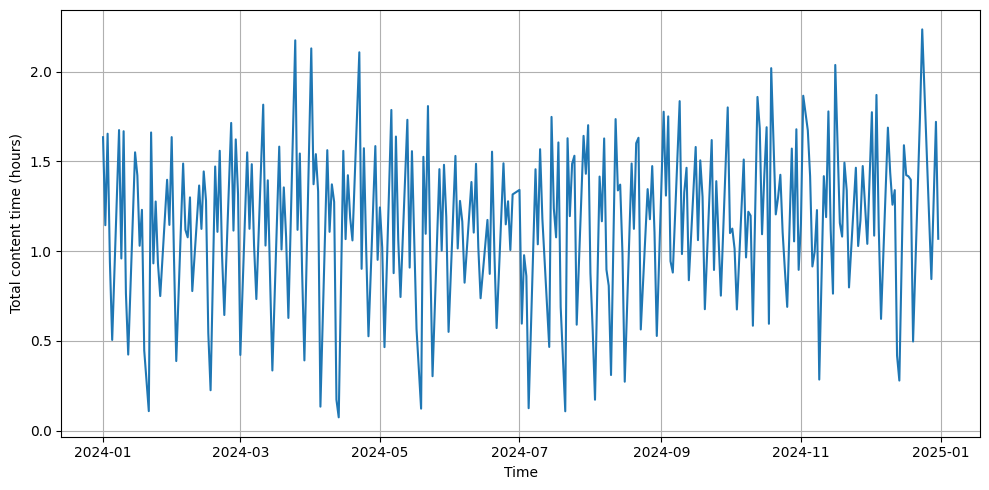

In [43]:
# Plot a line graph of total content time (in hours) at a daily frequency for 2024
plot_total_durations(
    filter_duration_dates(
        total_video_durations["daily_total_durations"],
        start="2024-01-01",
        end="2024-12-31"))

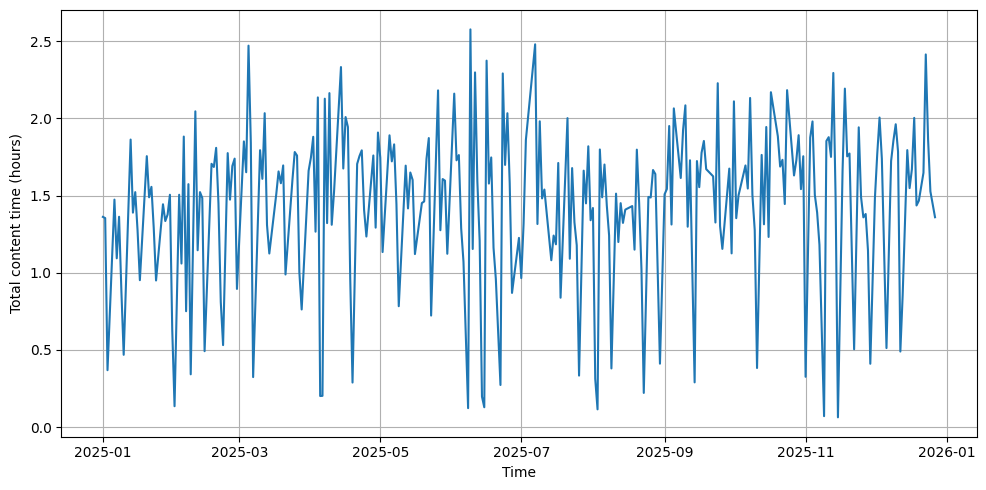

In [44]:
# Plot a line graph of total content time (in hours) at a daily frequency for 2025
plot_total_durations(
    filter_duration_dates(
        total_video_durations["daily_total_durations"],
        start="2025-01-01",
        end="2025-12-31"))